<h2> Necessary functions </h2>

In [12]:
# call all necessary functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix,accuracy_score, fbeta_score
import sklearn.metrics as metrics

In [2]:
def PrintStats(y_test, pred, output_print=False):
    f1Score = round(f1_score(y_test, pred), 2)
    fbetaScore = round(fbeta_score(y_test, pred, beta=1.25))
    recallScore = round(recall_score(y_test, pred), 2)
    precscore = round(precision_score(y_test, pred), 2)
    accScore = round(accuracy_score(y_test, pred), 2)
    
    #roc curve
    auc = PlotROC(y_test,pred)
    
    print("Accuracy for Model : {acc_score}".format(acc_score = accScore))
    print("Precision for Model : {prec_score}".format(prec_score = precscore))
    print("Sensitivity/Recall for Model : {recall_score}".format(recall_score = recallScore))
    print("F1 Score for Model : {f1_score}".format(f1_score = f1Score))
    print("F-Beta Score for Model : {fbeta_score}".format(fbeta_score = fbetaScore))
    
    output = [accScore,precscore,recallScore,f1Score, fbetaScore,auc]
    
    if output_print:
        return output

<h2> Random Oversampling Method & Other Functions</h2>

In [9]:
def Oversample(X_train,Y_train,print_output=False):
    Train_set = np.concatenate((X_train, Y_train), axis=1)

    #Convert back to dataframe for random oversampling
    df = pd.DataFrame.from_records(Train_set)

    # Class count
    count_class_0, count_class_1 = df.iloc[:,30].value_counts()

    # Divide by class
    df_class_0 = df[df.iloc[:,30] == 0]
    df_class_1 = df[df.iloc[:,30] == 1]

    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df = pd.concat([df_class_0, df_class_1_over], axis=0)

    #shuffle rows
    df.sample(frac=1)

    # df_test_over.Class.value_counts().plot(kind='bar', title='Count (target)');
    Y_train = df.iloc[:,30].values
    X_train = df.iloc[:,0:30].values
    
    if print_output == True:
        print('Random over-sampling:')
        print(df.iloc[:,30].value_counts())
    
    return X_train, Y_train

def Convert_prob_to_class(Y_test_hat):
    Y_test_hat[Y_test_hat > 0.5] = 1
    Y_test_hat[Y_test_hat < 0.5] = 0

def PlotROC(y_test,pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return roc_auc   

<h2> Set Dataframe </h2>

In [3]:
df = pd.read_csv('datasets/creditcard-training set v2.csv')
df.head()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


<h2>Generate Chart</h2>

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1224x720 with 0 Axes>

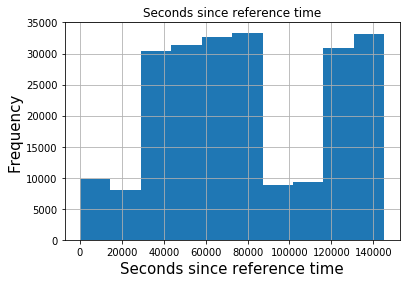

<Figure size 1224x720 with 0 Axes>

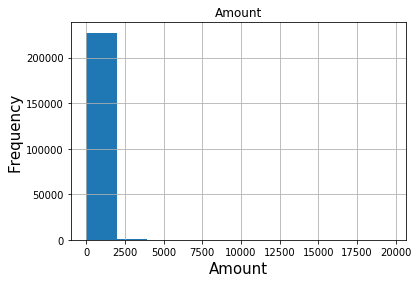

<Figure size 1224x720 with 0 Axes>

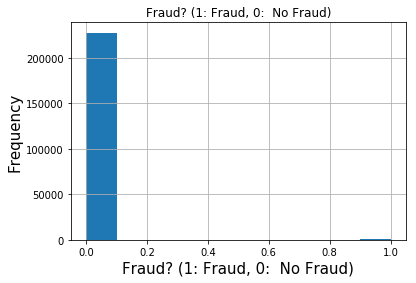

<Figure size 1224x720 with 0 Axes>

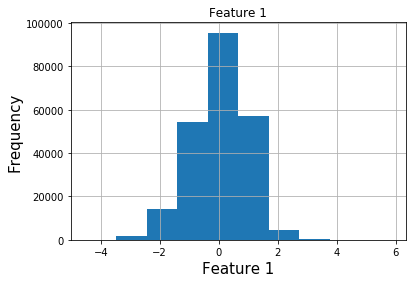

<Figure size 1224x720 with 0 Axes>

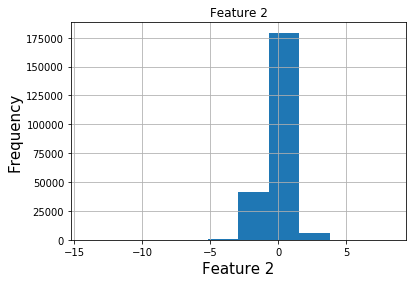

<Figure size 1224x720 with 0 Axes>

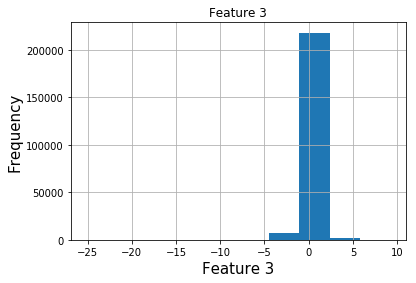

<Figure size 1224x720 with 0 Axes>

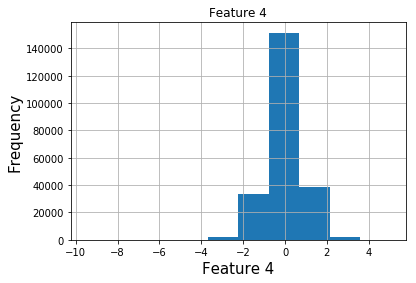

<Figure size 1224x720 with 0 Axes>

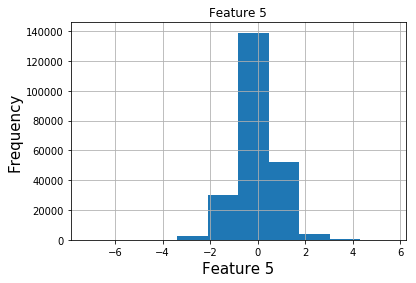

<Figure size 1224x720 with 0 Axes>

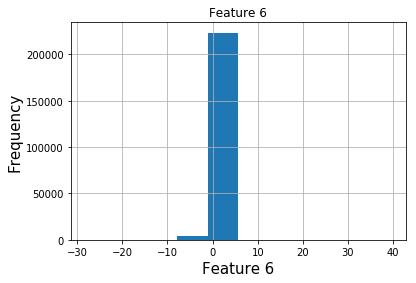

<Figure size 1224x720 with 0 Axes>

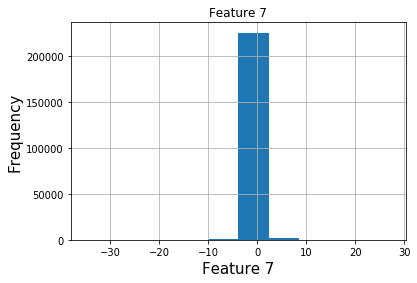

<Figure size 1224x720 with 0 Axes>

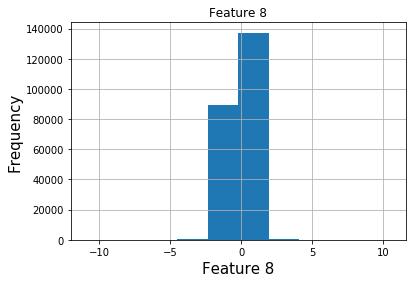

<Figure size 1224x720 with 0 Axes>

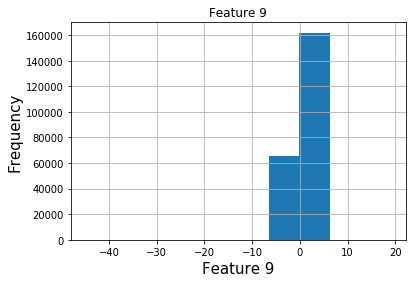

<Figure size 1224x720 with 0 Axes>

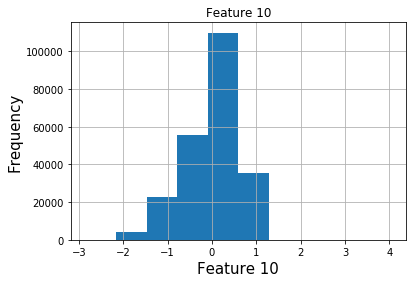

<Figure size 1224x720 with 0 Axes>

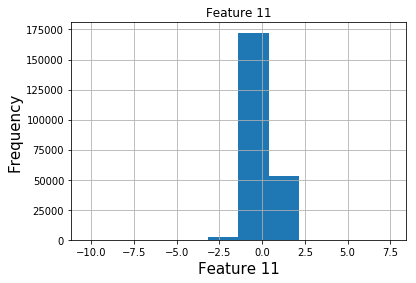

<Figure size 1224x720 with 0 Axes>

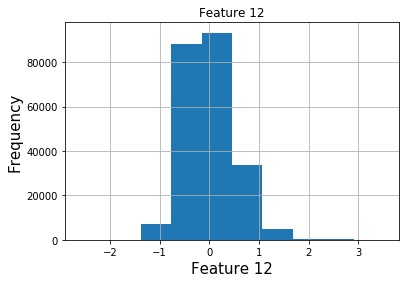

<Figure size 1224x720 with 0 Axes>

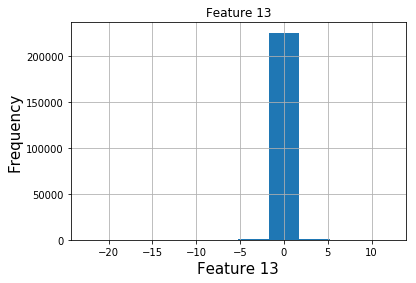

<Figure size 1224x720 with 0 Axes>

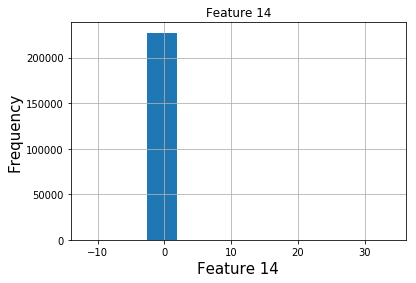

<Figure size 1224x720 with 0 Axes>

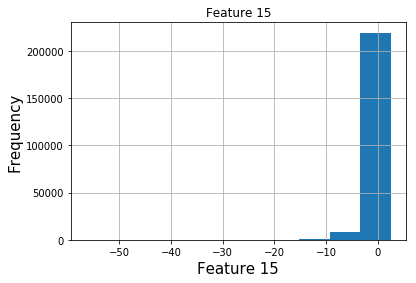

<Figure size 1224x720 with 0 Axes>

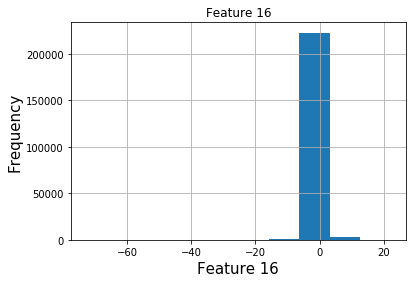

<Figure size 1224x720 with 0 Axes>

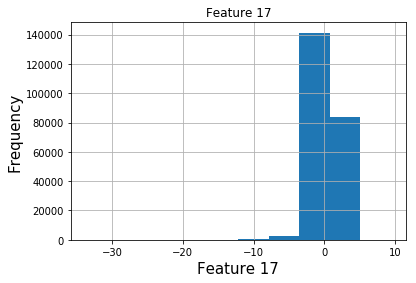

<Figure size 1224x720 with 0 Axes>

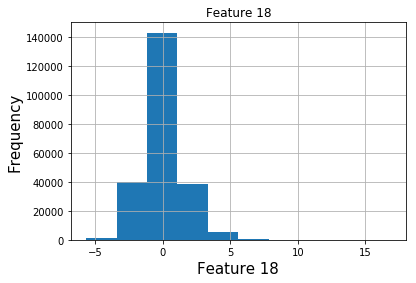

<Figure size 1224x720 with 0 Axes>

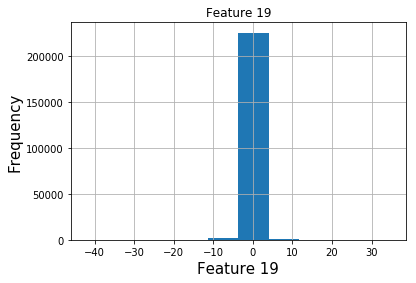

<Figure size 1224x720 with 0 Axes>

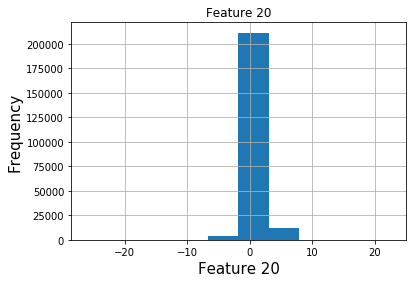

<Figure size 1224x720 with 0 Axes>

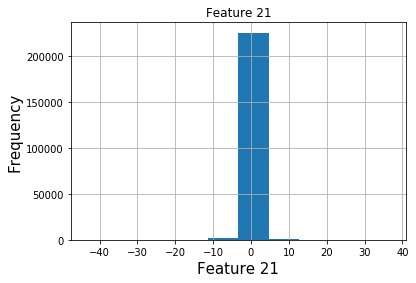

<Figure size 1224x720 with 0 Axes>

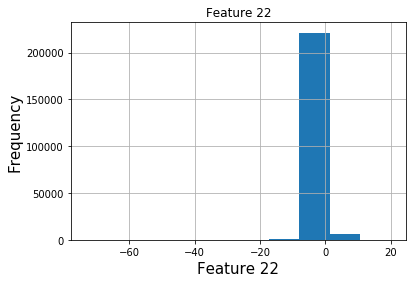

<Figure size 1224x720 with 0 Axes>

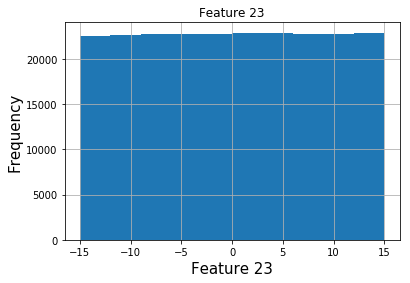

<Figure size 1224x720 with 0 Axes>

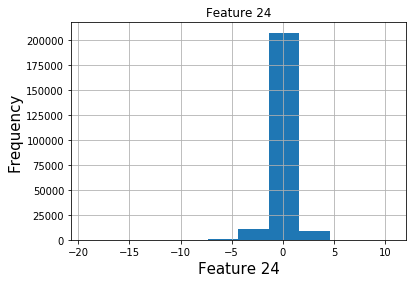

<Figure size 1224x720 with 0 Axes>

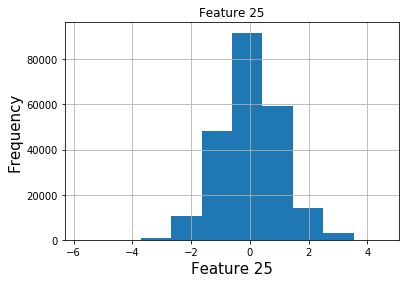

<Figure size 1224x720 with 0 Axes>

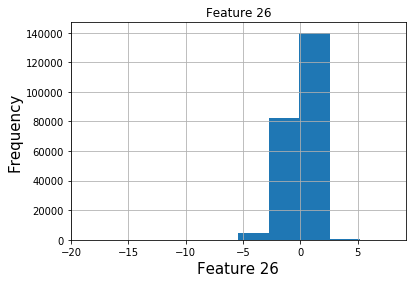

<Figure size 1224x720 with 0 Axes>

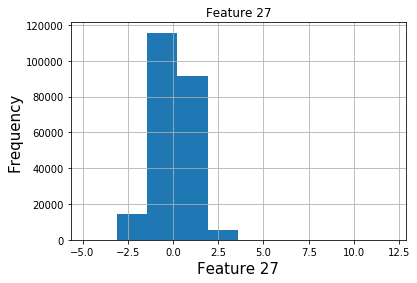

<Figure size 1224x720 with 0 Axes>

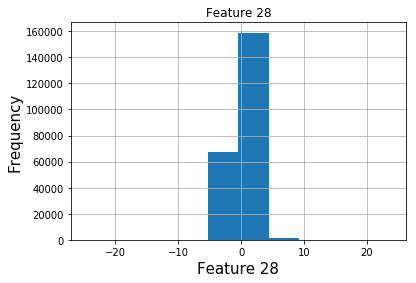

<Figure size 1224x720 with 0 Axes>

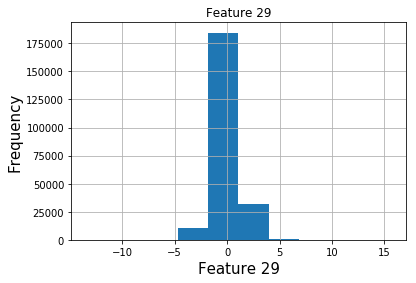

In [4]:
# execute this next to check graph
for row in df.head():
    fig=plt.figure(figsize=(17,10))
    df.hist(column=row)
    plt.xlabel(row,fontsize=15)
    plt.ylabel("Frequency",fontsize=15)

# From these charts, we can see that the distribution for feature 23 is considered uniform.
# It is meaningless and would introduce noisy outputs to our machine learning model, which is why we would drop it later


<h2>% of Null Values</h2>

In [5]:
# this is just to check null values, not necessary to execute
count = df.shape[0]
nulls = [0]
for row in df.head():
    if (df[row].isnull().sum() > 0):
        nulls.append(df[row].isnull().sum())
        print("'"+row+"'",'has',df[row].isnull().sum(),'missing values')
percentage_nulls = max(nulls)/count

print('Total rows is',count)
print('% of null values is',percentage_nulls)

# Based on the low %, we will be dropping the rows that has null values

'Feature 5' has 27 missing values
'Feature 6' has 59 missing values
Total rows is 227844
% of null values is 0.00025894910552834395


<h2> Format properly with dropping rows which contains null values </h2>

In [7]:
# drop rows which has null values
df = df.dropna()

# rename columns
new_names =  {'Seconds since reference time': 'Time',
'Amount': 'Amount',
'Fraud? (1: Fraud, 0:  No Fraud)': 'Class',
'Feature 1': 'F1',
'Feature 2': 'F2',
'Feature 3': 'F3',
'Feature 4': 'F4',
'Feature 5': 'F5',
'Feature 6': 'F6',
'Feature 7': 'F7',
'Feature 8': 'F8',
'Feature 9': 'F9',
'Feature 10': 'F10',
'Feature 11': 'F11',
'Feature 12': 'F12',
'Feature 13': 'F13',
'Feature 14': 'F14',
'Feature 15': 'F15',
'Feature 16': 'F16',
'Feature 17': 'F17',
'Feature 18': 'F18',
'Feature 19': 'F19',
'Feature 20': 'F20',
'Feature 21': 'F21',
'Feature 22': 'F22',
'Feature 23': 'F23',
'Feature 24': 'F24',
'Feature 25': 'F25',
'Feature 26': 'F26',
'Feature 27': 'F27',
'Feature 28': 'F28',
'Feature 29': 'F29'}
df.rename(columns=new_names, inplace=True)
#drop feature 23
df.drop(['F23'], inplace=True, axis=1)
columns = ["Time","F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13","F14","F15","F16","F17","F18","F19","F20","F21","F22","F24","F25",'F26','F27',"F28","F29","Amount"]

<h2>Split into training and testing data</h2>

In [8]:
# execute this to split into train and test data
X = pd.DataFrame.as_matrix(df,columns=columns)
Y = df.Class
Y = Y.values.reshape(Y.shape[0],1)
X.shape
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


(182209, 30) (45553, 30) (182209, 1) (45553, 1)


<h2>Train Model </h2>

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


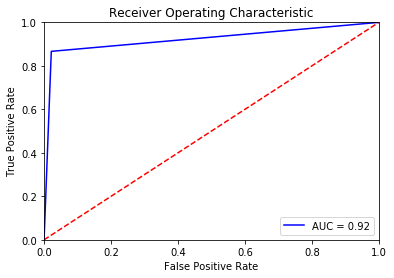

Accuracy for Model : 0.98
Precision for Model : 0.06
Sensitivity/Recall for Model : 0.87
F1 Score for Model : 0.12
F-Beta Score for Model : 0.0


In [13]:
#Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#oversampling
X_train, Y_train = Oversample(X_train,Y_train)

model = LogisticRegression(C=1)

model.fit(X_train, Y_train.ravel())

Y_test_hat = model.predict(X_test)
Convert_prob_to_class(Y_test_hat)

#Print metrics 
PrintStats(Y_test,Y_test_hat)

<h2>Cross-Validation</h2>

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 1


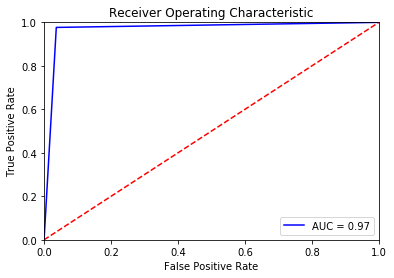

Accuracy for Model : 0.96
Precision for Model : 0.09
Sensitivity/Recall for Model : 0.98
F1 Score for Model : 0.17
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 2


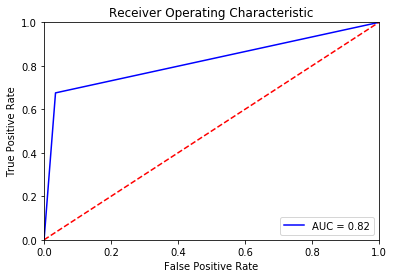

Accuracy for Model : 0.96
Precision for Model : 0.06
Sensitivity/Recall for Model : 0.68
F1 Score for Model : 0.11
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 3


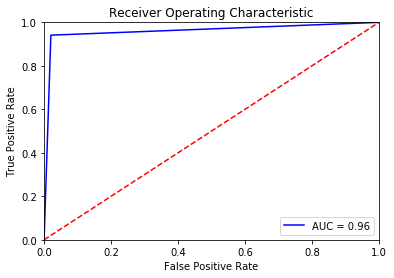

Accuracy for Model : 0.98
Precision for Model : 0.06
Sensitivity/Recall for Model : 0.94
F1 Score for Model : 0.12
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 4


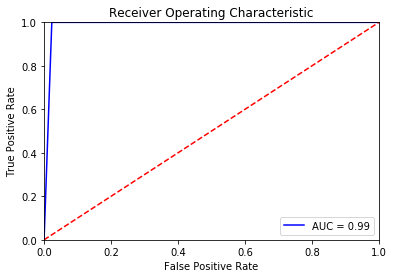

Accuracy for Model : 0.98
Precision for Model : 0.13
Sensitivity/Recall for Model : 1.0
F1 Score for Model : 0.23
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 5


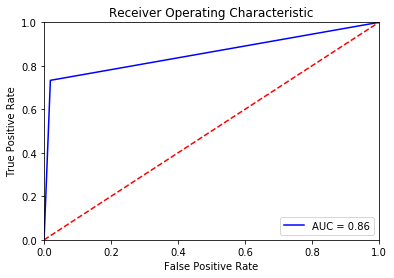

Accuracy for Model : 0.98
Precision for Model : 0.05
Sensitivity/Recall for Model : 0.73
F1 Score for Model : 0.09
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 6


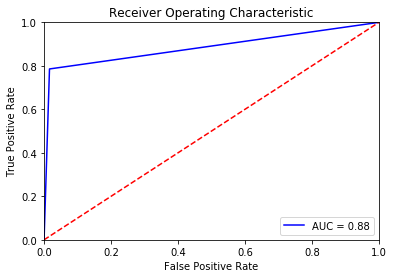

Accuracy for Model : 0.98
Precision for Model : 0.06
Sensitivity/Recall for Model : 0.79
F1 Score for Model : 0.11
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 7


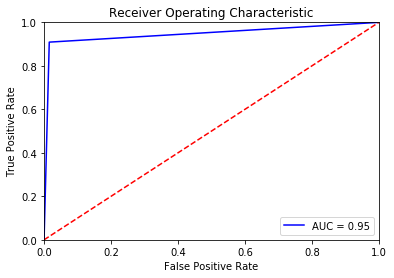

Accuracy for Model : 0.98
Precision for Model : 0.1
Sensitivity/Recall for Model : 0.91
F1 Score for Model : 0.18
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 8


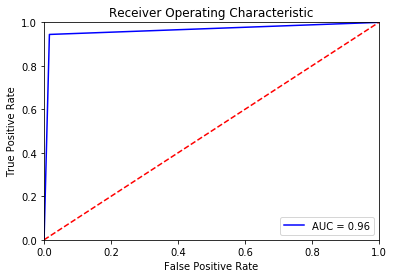

Accuracy for Model : 0.98
Precision for Model : 0.09
Sensitivity/Recall for Model : 0.94
F1 Score for Model : 0.16
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 9


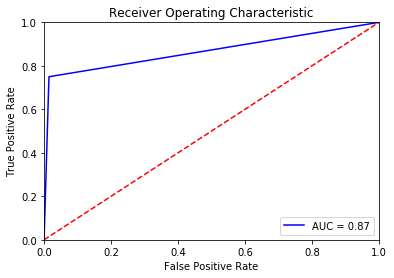

Accuracy for Model : 0.98
Precision for Model : 0.08
Sensitivity/Recall for Model : 0.75
F1 Score for Model : 0.15
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 10


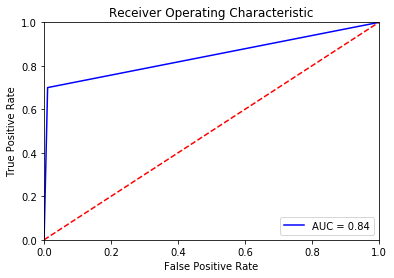

Accuracy for Model : 0.99
Precision for Model : 0.06
Sensitivity/Recall for Model : 0.7
F1 Score for Model : 0.1
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 11


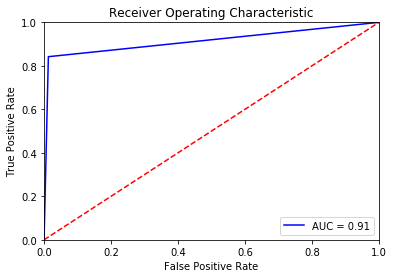

Accuracy for Model : 0.99
Precision for Model : 0.1
Sensitivity/Recall for Model : 0.84
F1 Score for Model : 0.18
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 12


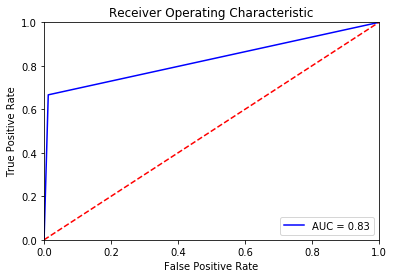

Accuracy for Model : 0.99
Precision for Model : 0.01
Sensitivity/Recall for Model : 0.67
F1 Score for Model : 0.03
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 13


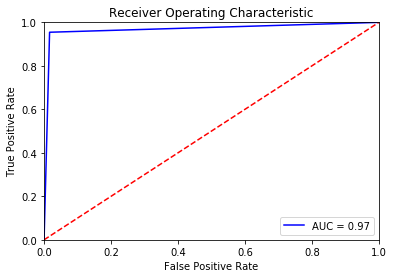

Accuracy for Model : 0.98
Precision for Model : 0.1
Sensitivity/Recall for Model : 0.95
F1 Score for Model : 0.18
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 14


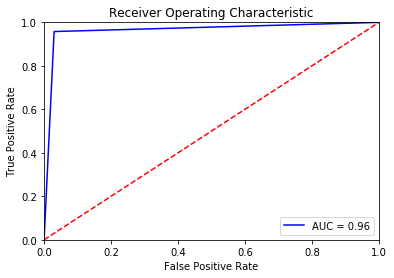

Accuracy for Model : 0.97
Precision for Model : 0.17
Sensitivity/Recall for Model : 0.96
F1 Score for Model : 0.28
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 15


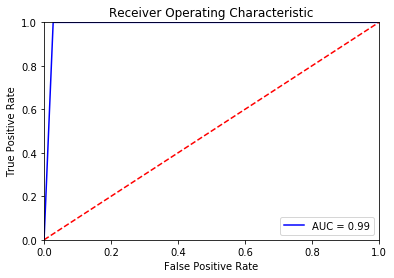

Accuracy for Model : 0.97
Precision for Model : 0.01
Sensitivity/Recall for Model : 1.0
F1 Score for Model : 0.03
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 16


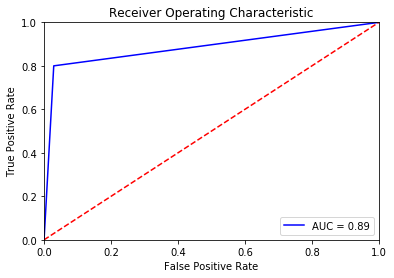

Accuracy for Model : 0.97
Precision for Model : 0.01
Sensitivity/Recall for Model : 0.8
F1 Score for Model : 0.02
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 17


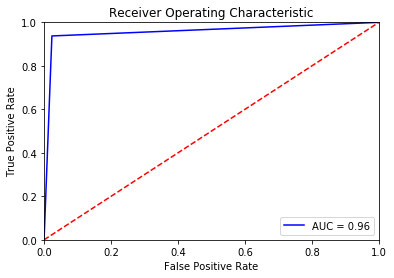

Accuracy for Model : 0.98
Precision for Model : 0.05
Sensitivity/Recall for Model : 0.94
F1 Score for Model : 0.1
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 18


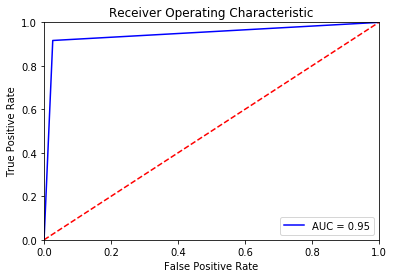

Accuracy for Model : 0.97
Precision for Model : 0.04
Sensitivity/Recall for Model : 0.92
F1 Score for Model : 0.07
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 19


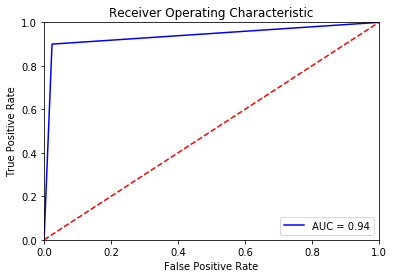

Accuracy for Model : 0.98
Precision for Model : 0.03
Sensitivity/Recall for Model : 0.9
F1 Score for Model : 0.06
F-Beta Score for Model : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Metrics for fold number: 20


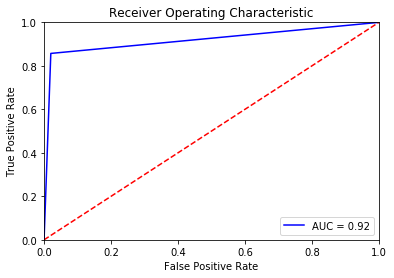

Accuracy for Model : 0.98
Precision for Model : 0.05
Sensitivity/Recall for Model : 0.86
F1 Score for Model : 0.09
F-Beta Score for Model : 0.0

Summary metrics:
Accuracy for Model : 0.9775000000000003
Precision for Model : 0.06749999999999999
Sensitivity/Recall for Model : 0.8629999999999999
F1 Score for Model : 0.12299999999999997
F-Beta Score for Model : 0.0
AUC for Model : 0.920547378389505


In [14]:
#Define parameters for k-fold cv
n_splits = 20
kf = KFold(n_splits)
Metric_array = np.zeros(6)

counter = 1

#Start k-fold cross validation 
for train_index, test_index in kf.split(X):
    
    #Split into training and testing set
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    #Oversampling of training set ONLY
    X_train, Y_train = Oversample(X_train,Y_train)
    
    #run the model
    model.fit(X_train, Y_train)
    
    #Run forward prop to get predicted values
    Y_test_hat = model.predict(X_test)
    Convert_prob_to_class(Y_test_hat)
    
    print('\nMetrics for fold number: ' + str(counter))
    counter += 1
    
    #Print metrics and store in numpy array to average after end of cv 
    Metric_array += PrintStats(Y_test,Y_test_hat,True)
    
#Averaging of metrics    
Metric_array /= n_splits
np.around(Metric_array, decimals=2)

print('\nSummary metrics:')
print("Accuracy for Model : {acc_score}".format(acc_score = Metric_array[0]))
print("Precision for Model : {prec_score}".format(prec_score = Metric_array[1]))
print("Sensitivity/Recall for Model : {recall_score}".format(recall_score = Metric_array[2]))
print("F1 Score for Model : {f1_score}".format(f1_score = Metric_array[3]))
print("F-Beta Score for Model : {f1_score}".format(f1_score = Metric_array[4]))
print("AUC for Model : {auc}".format(auc = Metric_array[5]))